In [1]:
# python warning off
import warnings
warnings.filterwarnings('ignore')

# tensorflow warning off
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
%matplotlib inline 
import numpy as np #Numerical python
import pandas as pd #데이터 분석(R의 기능 일부를 가져옮)
import seaborn as sns #시각화 라이브러리

In [3]:
df = pd.read_excel('C:/Users/User/datasets/titanic.xls')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [4]:
df.info() #features의 자료형 표시

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [5]:
df.describe() # 통계 정보

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


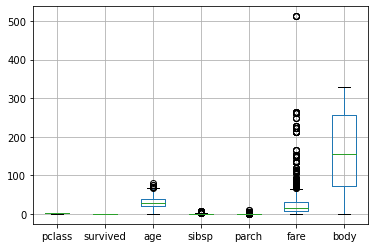

In [6]:
df.boxplot() #데이터의 이상치(outlier)를 확인하고, 데이터의 분포를 확인

In [7]:
import matplotlib.pyplot as plt
df['survived'].value_counts()

0    809
1    500
Name: survived, dtype: int64

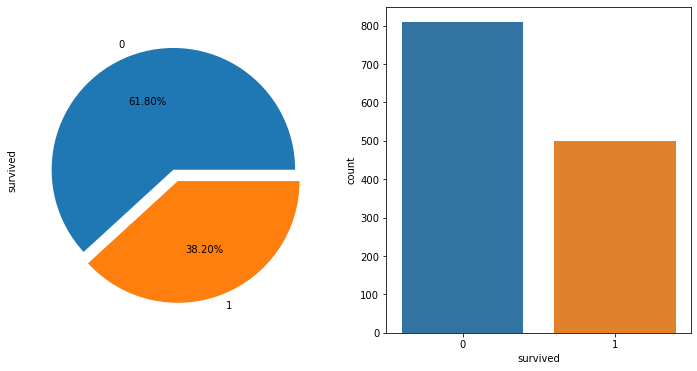

In [8]:
_, ax = plt.subplots(1, 2, figsize=(12, 6)) # 그림을 1행 2열로 그리겠다
df['survived'].value_counts().plot.pie(explode=[0, 0.1],
                                               autopct="%.2f%%",
                                               ax=ax[0])
sns.countplot('survived', data=df, ax=ax[1])

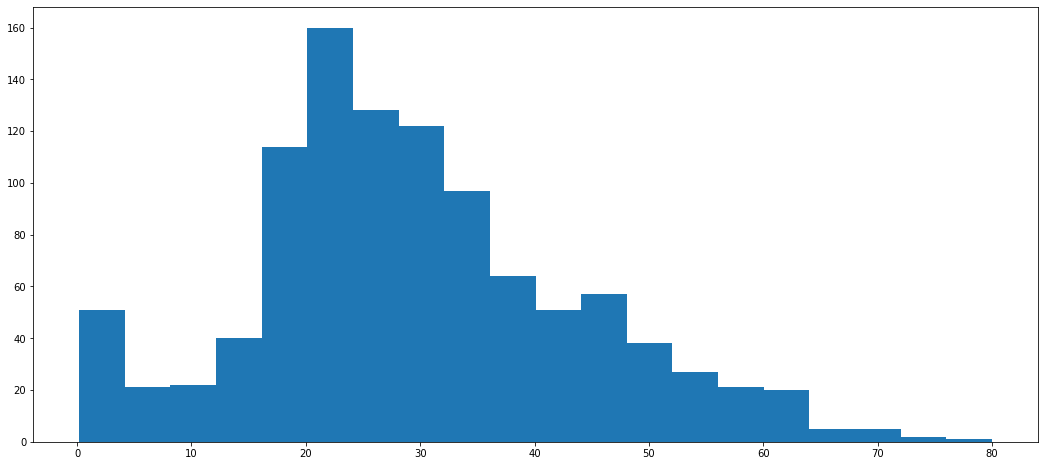

In [9]:
df['age'].hist(bins=20, figsize=(18, 8), grid=False) # 히스토그램 생성

In [10]:
df.groupby('pclass').mean() # pclass group 단위로 묶어서 각 요소의 평균을 계산

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [11]:
df.corr() # 상관관계 확인

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


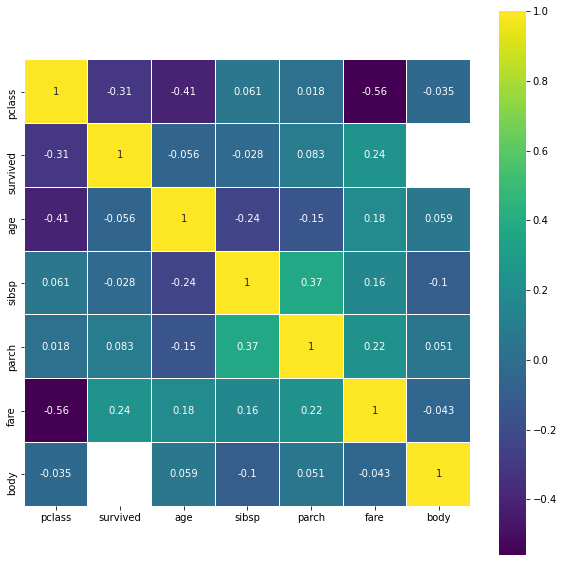

In [12]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), linewidths=0.01, square=True, 
            cmap=plt.cm.viridis, linecolor='white', annot=True)
# 선실 등급이 올라갈수록 생존률은 떨어짐. 그래서 survived, pclass의 값이 -0.31이 나옴.
# 결측치는 흰색으로 나옴

In [13]:
df['age_cat'] = pd.cut(df['age'], bins=[0,10,20,50,100], # 추가할 컬럼을 적어주고, 오른쪽에 연산을 작성
                      include_lowest=True,
                      labels=['baby', 'teenage', 'adult', 'old']) # lowest의미는 0~9, 10~19, 20~49, 50~100로 만들어준다. 범주형 자료로
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",adult
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,teenage
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,adult
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,adult


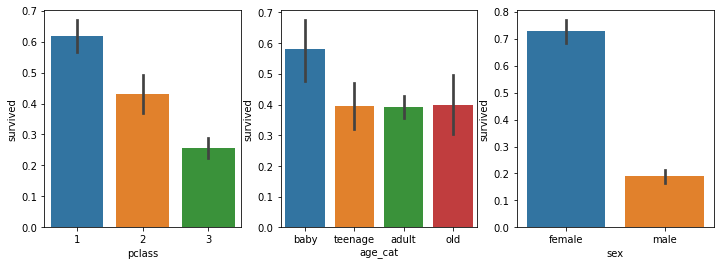

In [14]:
plt.figure(figsize=(12, 4))
plt.subplot(131) # 1행 3열 1번째 그림
sns.barplot('pclass', 'survived', data=df) # x=pclass, y=survived
plt.subplot(132) # 1행 3열 2번째 그림
sns.barplot('age_cat', 'survived', data=df)
plt.subplot(133) # 1행 3열 3번째 그림
sns.barplot('sex', 'survived', data=df)

In [15]:
# 검은색 바는 error 표시
# 탐색적 데이터 분석 : 데이터를 모르는 상태에서 데이터를 이해하는 과정.
# 도메인 지식 : 데이터를 알고 있는 경우

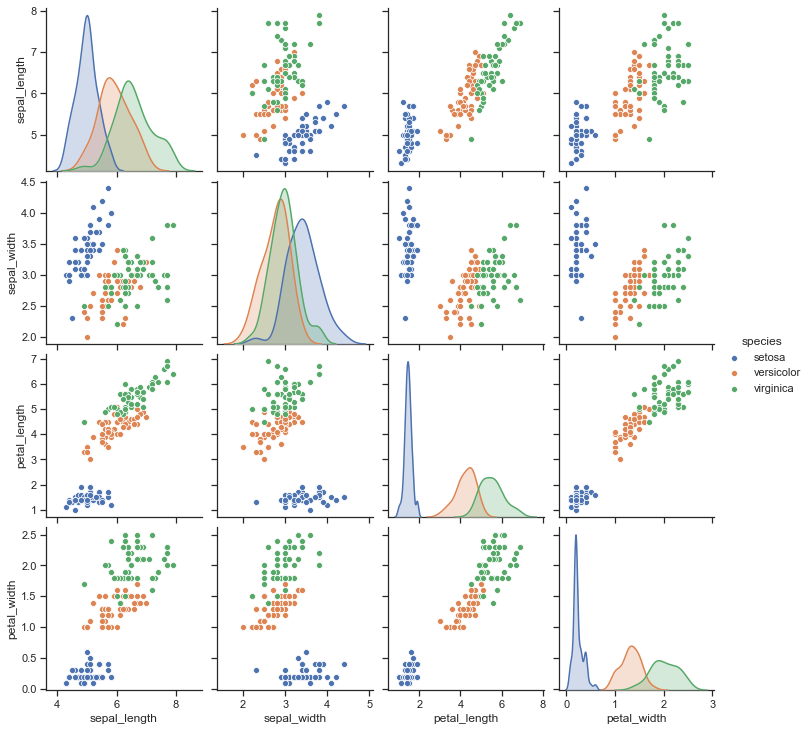

In [16]:
sns.set(style="ticks")

df_iris = sns.load_dataset("iris")
sns.pairplot(df_iris, hue="species")

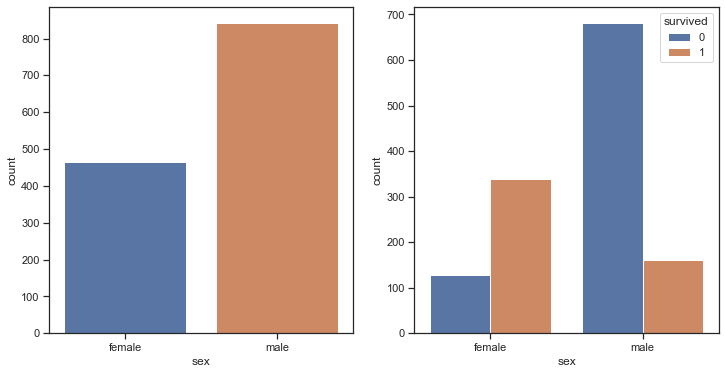

In [17]:
_, ax = plt.subplots(1, 2, figsize=(12, 6)) # 1행 2열 그림의 사이즈는 12 x 6
sns.countplot('sex', data=df, ax=ax[0])
sns.countplot('sex', hue='survived', data=df, ax=ax[1])

In [18]:
tmp = []
for i in df['sex']:
    if i == 'female':
        tmp.append(1)
    else:
        tmp.append(0)
df['sex'] = tmp
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",adult
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",1,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,teenage
1305,3,0,"Zabour, Miss. Thamine",1,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",0,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,adult
1307,3,0,"Zakarian, Mr. Ortin",0,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,adult


In [19]:
df = df[df['age'].notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1046 non-null   int64   
 1   survived   1046 non-null   int64   
 2   name       1046 non-null   object  
 3   sex        1046 non-null   int64   
 4   age        1046 non-null   float64 
 5   sibsp      1046 non-null   int64   
 6   parch      1046 non-null   int64   
 7   ticket     1046 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1044 non-null   object  
 11  boat       417 non-null    object  
 12  body       120 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1046 non-null   category
dtypes: category(1), float64(3), int64(5), object(6)
memory usage: 123.8+ KB


In [20]:
df[df['fare'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
1225,3,0,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,S,NaN,261.0,NaN,old


In [21]:
df = df[df['fare'].notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   int64   
 1   survived   1045 non-null   int64   
 2   name       1045 non-null   object  
 3   sex        1045 non-null   int64   
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   int64   
 6   parch      1045 non-null   int64   
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1045 non-null   category
dtypes: category(1), float64(3), int64(5), object(6)
memory usage: 123.7+ KB


In [22]:
#        pclass, sex, age, slisp, parch, fare
# index :  0      3    4     5      6      8
# feature selection
x_data = df.values[:, [0,3,4,5,6,8]] # 모든 행에서 0, 3, 4, 5, 6, 8 열을 사용하겠다.
x_data # 2차원 배열로 표현

array([[1, 1, 29.0, 0, 0, 211.3375],
       [1, 0, 0.9167, 1, 2, 151.55],
       [1, 1, 2.0, 1, 2, 151.55],
       ...,
       [3, 0, 26.5, 0, 0, 7.225],
       [3, 0, 27.0, 0, 0, 7.225],
       [3, 0, 29.0, 0, 0, 7.875]], dtype=object)

In [23]:
# y_data는 정답
y_data = df.values[:, [1]] # 1:survived
y_data

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=object)

In [24]:
#일반적으로 train data는 80%, test data는 20%로 설정한다.
#데이터를 뽑을 때 랜덤하게 섞어줘야 한다.
#y는 정답, x_data의 90%가 x_train 10%가 x_test, y_data의 90%가 y_train 10%가 y_test
# test_size = 0.1은 10%를 test data로 만든다는 의미
#random_state=7은 seed 값을 고정시켜서 항상 같은 값이 나오게 만든다. 쪼개지는 개수를 고정.
#seed 값은 아무 값으로 설정하면 된다. seed값을 설정하지 않으면 시간으로 seed가 설정된다.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.1, random_state=7
) 
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((940, 6), (940, 1), (105, 6), (105, 1))

In [25]:
import keras

Using TensorFlow backend.


 layer마다 뉴런의 개수를 설정한다. 뉴런의 개수는 2^n으로 설정한다. layer마다 결과 값이 전송될 때 activation fuction으로 ReLu를 사용한다.    
 titanic 문제는 이진분류 문제이기 때문에 정답은 1 or 0이 나온다. 이진분류일 때는 last layer에 하나의 뉴런만 존재하고 뉴런의 return value를 sigmoid 함수에 input 값으로 사용해서 sigmoid의 output을 DL의 최종 return 값으로 반환한다. 0.5를 기준으로 0.5 이상이면 생존, 0.5미만이면 사망이다.    
 모든 뉴런은 fully-connected이다.    
 variables 와 weights는 행렬 연산을 한다. 만약 최종 값이 5인데 DL의 결과 값이 3이면 뉴런의 weights(hyperparameter)를 tunning해서 결과 값이 5가 나오도록 설정한다.(backpropagation)    
 이진분류일 때는 마지막에 sigmoid를 붙인다.   
 다중분류일 때는 마지막에 softmax를 붙인다.   
 값은 마지막에 아무것도 안붙인다.   
* 설명 가능한 인공지능을 하려면 수학에 대해서 정리가 필요하다.

In [29]:
#python에서 대문자는 class이다. 
from keras.models import Sequential # Sequential은 인간의 뇌 또는 건물이라고 생각
from keras.layers import Dense # Dense는 건물의 한층, Dense간에는 FC(Fully Connected)

model = Sequential()
# 한개의 layer에 128개의 뉴런을 만들고, 입력 값으로 6개의 feature를 입력 받는다. tuple임을 명시하기 위해서 6,로 명시한다. ,를 포함하지 않으면 정수로 표시
# input_shape는 1층에만 쓴다.
# 모델 설계
model.add(Dense(128, input_shape=(6,), activation='relu')) # 1층
model.add(Dense(128, activation='relu')) # 2층
model.add(Dense(1, activation='sigmoid')) # 이진분류이기 때문에 sigmoid 사용, 리턴 값은 0~1 사이에 값, 3층

#모델 설정
# 비용함수가 0 이 되는 값을 찾기 위해서 weight를 최적화해야 한다. 기본적인게 gradient descent인데 adam은 현재 가장 많이 사용되는 optimizer이다.
# 비용함수가 0이 된다는 의미는 미분을 했을 때 미분계수 값이 0이 되는 지점이다. 즉 그래프 상에서 최소값이 미분계수가 0이 되는 지점이다.
model.compile(loss='mse', optimizer='adam', metrics=['accuracy']) #비용함수 MSE, optimizer adam, 관심 영역 accuracy

# x_train, y_train으로 학습시킨다.
# validation을 하기 위해서 x_test, y_test로 검증한다.
# epochs로 훈련 횟수를 지정한다.
#모델 훈련
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=500) # epochs 훈련 횟수
#loss : 훈련할 때 비용
#acc : 정확도
#val_loss : 검증할 때 비용
#val_acc : 검증 정확도

Train on 940 samples, validate on 105 samples
Epoch 1/500
940/940 [==============================] - 0s 434us/step - loss: 0.2439 - acc: 0.6330 - val_loss: 0.2310 - val_acc: 0.6857
Epoch 2/500
940/940 [==============================] - 0s 47us/step - loss: 0.2221 - acc: 0.6723 - val_loss: 0.2559 - val_acc: 0.6190
Epoch 3/500
940/940 [==============================] - 0s 38us/step - loss: 0.2035 - acc: 0.7011 - val_loss: 0.1842 - val_acc: 0.7619
Epoch 4/500
940/940 [==============================] - 0s 42us/step - loss: 0.1975 - acc: 0.7266 - val_loss: 0.1874 - val_acc: 0.7619
Epoch 5/500
940/940 [==============================] - 0s 41us/step - loss: 0.2059 - acc: 0.7170 - val_loss: 0.1868 - val_acc: 0.7619
Epoch 6/500
940/940 [==============================] - 0s 46us/step - loss: 0.1864 - acc: 0.7330 - val_loss: 0.1752 - val_acc: 0.7619
Epoch 7/500
940/940 [==============================] - 0s 40us/step - loss: 0.1868 - acc: 0.7383 - val_loss: 0.2054 - val_acc: 0.7048
Epoch 8/500
940

940/940 [==============================] - 0s 42us/step - loss: 0.1336 - acc: 0.8245 - val_loss: 0.1543 - val_acc: 0.8095
Epoch 122/500
940/940 [==============================] - 0s 40us/step - loss: 0.1296 - acc: 0.8298 - val_loss: 0.1588 - val_acc: 0.7810
Epoch 123/500
940/940 [==============================] - 0s 39us/step - loss: 0.1377 - acc: 0.8309 - val_loss: 0.1566 - val_acc: 0.8000
Epoch 124/500
940/940 [==============================] - 0s 41us/step - loss: 0.1270 - acc: 0.8319 - val_loss: 0.1554 - val_acc: 0.8000
Epoch 125/500
940/940 [==============================] - 0s 46us/step - loss: 0.1294 - acc: 0.8191 - val_loss: 0.1477 - val_acc: 0.8190
Epoch 126/500
940/940 [==============================] - 0s 45us/step - loss: 0.1251 - acc: 0.8330 - val_loss: 0.1503 - val_acc: 0.8190
Epoch 127/500
940/940 [==============================] - 0s 42us/step - loss: 0.1342 - acc: 0.8181 - val_loss: 0.1513 - val_acc: 0.8095
Epoch 128/500
940/940 [==============================] - 0s 44

940/940 [==============================] - 0s 40us/step - loss: 0.1165 - acc: 0.8404 - val_loss: 0.1947 - val_acc: 0.7714
Epoch 242/500
940/940 [==============================] - 0s 45us/step - loss: 0.1200 - acc: 0.8404 - val_loss: 0.1521 - val_acc: 0.8190
Epoch 243/500
940/940 [==============================] - 0s 39us/step - loss: 0.1282 - acc: 0.8287 - val_loss: 0.1710 - val_acc: 0.8000
Epoch 244/500
940/940 [==============================] - 0s 40us/step - loss: 0.1286 - acc: 0.8330 - val_loss: 0.1634 - val_acc: 0.8095
Epoch 245/500
940/940 [==============================] - 0s 41us/step - loss: 0.1227 - acc: 0.8309 - val_loss: 0.1589 - val_acc: 0.8095
Epoch 246/500
940/940 [==============================] - 0s 38us/step - loss: 0.1194 - acc: 0.8362 - val_loss: 0.1677 - val_acc: 0.8000
Epoch 247/500
940/940 [==============================] - 0s 42us/step - loss: 0.1202 - acc: 0.8426 - val_loss: 0.1531 - val_acc: 0.8000
Epoch 248/500
940/940 [==============================] - 0s 39

940/940 [==============================] - 0s 43us/step - loss: 0.1115 - acc: 0.8500 - val_loss: 0.1762 - val_acc: 0.7619
Epoch 362/500
940/940 [==============================] - 0s 39us/step - loss: 0.1146 - acc: 0.8489 - val_loss: 0.1635 - val_acc: 0.8095
Epoch 363/500
940/940 [==============================] - 0s 46us/step - loss: 0.1084 - acc: 0.8553 - val_loss: 0.1640 - val_acc: 0.7905
Epoch 364/500
940/940 [==============================] - 0s 41us/step - loss: 0.1088 - acc: 0.8479 - val_loss: 0.1624 - val_acc: 0.7905
Epoch 365/500
940/940 [==============================] - 0s 42us/step - loss: 0.1097 - acc: 0.8532 - val_loss: 0.1721 - val_acc: 0.7905
Epoch 366/500
940/940 [==============================] - 0s 44us/step - loss: 0.1097 - acc: 0.8479 - val_loss: 0.1708 - val_acc: 0.7905
Epoch 367/500
940/940 [==============================] - 0s 38us/step - loss: 0.1082 - acc: 0.8574 - val_loss: 0.1745 - val_acc: 0.8000
Epoch 368/500
940/940 [==============================] - 0s 42

940/940 [==============================] - 0s 45us/step - loss: 0.1065 - acc: 0.8574 - val_loss: 0.1747 - val_acc: 0.8000
Epoch 482/500
940/940 [==============================] - 0s 40us/step - loss: 0.1023 - acc: 0.8628 - val_loss: 0.1734 - val_acc: 0.7524
Epoch 483/500
940/940 [==============================] - 0s 48us/step - loss: 0.1039 - acc: 0.8574 - val_loss: 0.1769 - val_acc: 0.7905
Epoch 484/500
940/940 [==============================] - 0s 45us/step - loss: 0.1049 - acc: 0.8543 - val_loss: 0.1958 - val_acc: 0.7810
Epoch 485/500
940/940 [==============================] - 0s 48us/step - loss: 0.1063 - acc: 0.8585 - val_loss: 0.1845 - val_acc: 0.7714
Epoch 486/500
940/940 [==============================] - 0s 50us/step - loss: 0.0992 - acc: 0.8681 - val_loss: 0.1780 - val_acc: 0.7905
Epoch 487/500
940/940 [==============================] - 0s 48us/step - loss: 0.0984 - acc: 0.8681 - val_loss: 0.1819 - val_acc: 0.7905
Epoch 488/500
940/940 [==============================] - 0s 47

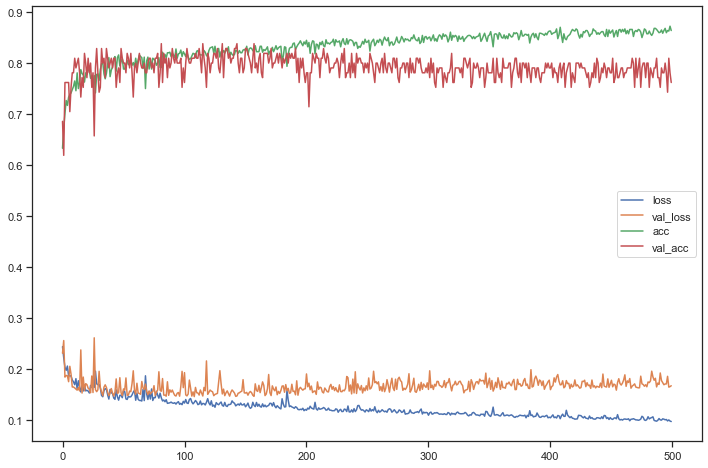

In [30]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) # 훈련 비용
plt.plot(hist.history['val_loss']) # 검증 비용
plt.plot(hist.history['acc']) # 훈련 정확도
plt.plot(hist.history['val_acc']) # 검증 정확도
plt.legend(['loss', 'val_loss', 'acc', 'val_acc']) # 범례
plt.show()

In [32]:
# 디카프리오는 살 수 있었나?
# 3등실, 남성, 19살, 형제 x, 부모 x, 싼표 5달러
dicaprio = np.array([3, 0, 19, 0, 0, 5]).reshape(1,6) # 1차원 배열을 2차원 배열 1행 6열로 바꿔줘야 한다.
model.predict(dicaprio)
# array([[0.10669782]], dtype=float32),  생존 확률 : 10%

array([[0.10669782]], dtype=float32)

In [34]:
# 여주인공 윈슬릿은?
# 1등실, 여성, 17살, 형제 o, 부모 o, 비싼표 100달러
winslet = np.array([1, 1, 17, 1, 2, 100]).reshape(1,6)
model.predict(winslet)
# array([[0.9999894]], dtype=float32), 생존 확률 : 99%

array([[0.9999894]], dtype=float32)